In [0]:
import numpy as np
import pandas as pd
import sklearn
import nltk
# from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from sklearn import feature_extraction,model_selection
from sklearn.metrics import confusion_matrix
import glob
import os
import string
import tensorflow as tf
import keras as K
import zipfile
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
def load_csv(path):
  df=pd.read_csv(path).drop(['Sub-task A','ID'],axis=1)
  df=df[(df['Sub-task B']=="NGEN")|(df['Sub-task B']=='GEN')].dropna()
  df['Sub-task B'] = df['Sub-task B'].map({'NGEN': 0, 'GEN': 1})
  return df

In [0]:
train_df=load_csv("/content/drive/My Drive/Minor Project/eng_train.csv")
dev_df=load_csv("/content/drive/My Drive/Minor Project/eng_dev.csv")
print(train_df.head())
print(dev_df.head())

                                                Text  Sub-task B
0                                          Next part           0
1                 Iii8mllllllm\nMdxfvb8o90lplppi0005           0
2  🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...           0
3  What the fuck was this? I respect shwetabh and...           0
4  Concerned authorities should bring arundathi R...           0
                                                Text  Sub-task B
0        U deserve more subscribers. U really great.           0
1                                     Nice video....           0
2  sorry if i bother somebody.. iam a defence asp...           1
3  Joker was amazing....it was not glamorised !.....           0
4                                          Nice baro           0


In [0]:
train_df.shape,dev_df.shape

((4263, 2), (1066, 2))

In [0]:
print(train_df['Sub-task B'].value_counts())
print(dev_df['Sub-task B'].value_counts())

0    3954
1     309
Name: Sub-task B, dtype: int64
0    993
1     73
Name: Sub-task B, dtype: int64


In [0]:
from keras.preprocessing.text import one_hot
vocab_size = 4000000
# encode full sentence into vector
encoded_docs=[one_hot(d,vocab_size) for d in train_df['Text']]
print (encoded_docs)
encoded_docs2=[one_hot(d,vocab_size) for d in dev_df['Text']]
print (encoded_docs2)

[[3920143, 2040217], [1308047, 1004049], [2298947, 843593, 270812, 1813401, 2985905, 3907601, 2094555, 136567, 3616179, 1261165], [3499276, 1006576, 832910, 3889737, 1261165, 1665717, 1712538, 1558300, 778065, 1665717, 2347641, 1102062, 2072222, 538648, 2248474, 1336682, 3580322, 944582, 2394722, 2960945, 3406036, 1261165, 375392, 3889737, 1167945, 1552447, 2698917, 1485468, 2150967, 1006576, 67084, 1336682, 1797242, 2490627, 1180214, 1368286, 1906901, 2150967, 3387307, 1336682, 2245743, 1368286, 2555937, 3099062, 2105479, 928697, 778065, 557720, 2940476, 1393154, 3187086, 259590, 2801027, 1678242, 1997495, 2482997, 2963988, 778065, 2092743, 2998630, 344359, 1808422, 3406036, 71431, 2711440, 3082449, 3687113, 1553204, 1261165, 67084, 3948296, 3320947, 944582, 2331114, 778065, 1368286, 1906901, 2892271, 1485468, 137580, 3544152, 3408917, 1336682, 2801027, 1797242, 1167945, 778065, 3935066, 938529, 1090477, 268799, 1797242, 778065, 3005998, 2862108, 778065, 2443365, 1814577, 2017991, 778

In [0]:
# pad documents to a max length of 4 words
max_length = 100
X_train = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(X_train)
X_test = pad_sequences(encoded_docs2, maxlen=max_length, padding='post')
print(X_test)

[[3920143 2040217       0 ...       0       0       0]
 [1308047 1004049       0 ...       0       0       0]
 [2298947  843593  270812 ...       0       0       0]
 ...
 [2547333 1678242 3544152 ... 2798796  660611  213499]
 [3134121 2550107 2048711 ...       0       0       0]
 [ 432036 1739789 1485468 ...       0       0       0]]
[[ 938529 2303088 2094555 ...       0       0       0]
 [2182347  435926       0 ...       0       0       0]
 [1940434 3935066 1665717 ... 2853132 1471181       0]
 ...
 [3244907  938529 2089736 ...       0       0       0]
 [3811696 1665717  372726 ...       0       0       0]
 [1368286 1997495 3887466 ...       0       0       0]]


In [0]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(np.asarray(train_df['Sub-task B']))
y_test = to_categorical(np.asarray(dev_df['Sub-task B']))
# y_train=np.array(train_df['Sub-task A'])
# y_dev=np.array(dev_df['Sub-task A'])
print(y_train.shape, y_test.shape)

(4263, 2) (1066, 2)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            32000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 128)           3200      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2432)              0         
____________________________________

In [0]:
history=model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=100,batch_size=100, verbose=2)




Train on 4263 samples, validate on 1066 samples
Epoch 1/100





 - 15s - loss: 0.3120 - acc: 0.9174 - val_loss: 0.2418 - val_acc: 0.9315
Epoch 2/100
 - 1s - loss: 0.2467 - acc: 0.9275 - val_loss: 0.2363 - val_acc: 0.9315
Epoch 3/100
 - 1s - loss: 0.2231 - acc: 0.9275 - val_loss: 0.2214 - val_acc: 0.9315
Epoch 4/100
 - 1s - loss: 0.1755 - acc: 0.9310 - val_loss: 0.2270 - val_acc: 0.9306
Epoch 5/100
 - 1s - loss: 0.1178 - acc: 0.9559 - val_loss: 0.2736 - val_acc: 0.9306
Epoch 6/100
 - 1s - loss: 0.0777 - acc: 0.9756 - val_loss: 0.3164 - val_acc: 0.9268
Epoch 7/100
 - 1s - loss: 0.0463 - acc: 0.9855 - val_loss: 0.3956 - val_acc: 0.9268
Epoch 8/100
 - 1s - loss: 0.0314 - acc: 0.9918 - val_loss: 0.3938 - val_acc: 0.9156
Epoch 9/100
 - 1s - loss: 0.0221 - acc: 0.9934 - val_loss: 0.4637 - val_acc: 0.9315
Epoch 10/100
 - 1s - loss: 0.0151 - acc: 0.9960 - val_loss: 0.4546 - val_acc: 0.9024
Epoch 11/100
 - 1s - loss: 0.0119 - acc: 0.9974 - val_loss: 0.4813 - val_acc: 0.9174
Epoch 12/100
 - 1

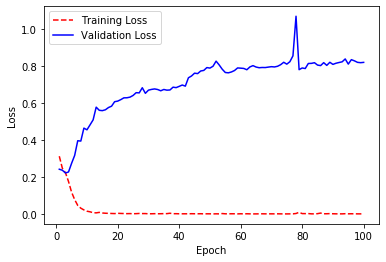

In [0]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.8187398802817539, 0.9174484052532833]


In [0]:
predictions_test = model.predict(X_test)
print(predictions_test)

[[1.0000000e+00 2.2524615e-14]
 [6.9924021e-01 3.0075976e-01]
 [7.3697287e-01 2.6302707e-01]
 ...
 [1.0000000e+00 5.6354399e-17]
 [1.0000000e+00 8.5915783e-17]
 [1.0000000e+00 9.3643964e-09]]


In [0]:
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       993
           1       0.37      0.29      0.32        73

   micro avg       0.92      0.92      0.92      1066
   macro avg       0.66      0.63      0.64      1066
weighted avg       0.91      0.92      0.91      1066
 samples avg       0.92      0.92      0.92      1066



In [0]:
predicting_df = pd.read_csv("/content/drive/My Drive/Minor Project/eng_test.csv")
test_df=tk.texts_to_sequences(predicting_df['Text'])
embedding_vecor_length =30
test_df = pad_sequences(test_df, maxlen=embedding_vecor_length, padding='post')
predictions_test = model.predict(test_df)
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1
predictions_test1 = predictions_test1.argmax(1)
predictions_test1 = pd.Series(predictions_test1)
predictions_test1 = predictions_test1.rename("Label")
ps = predicting_df['ID']
output_df = pd.merge(ps,predictions_test1,how='outer',left_index=True,right_index=True)
output_df['Label'] = output_df['Label'].map({'NGEN': 0, 'GEN': 1})
output_df.head()

In [0]:
output_df.to_csv("English_TaskB_Run1_CNN_Onehot.csv")